In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans

In [2]:
test = np.array([5,15,30,50,60,70,100,110,120]);

In [3]:
km.fit_predict(test.reshape(-1,1))

D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 2, 2, 2, 0, 0, 0])

In [4]:
DATA_PATH = os.path.join(os.getcwd(),'data','Mall_Customers.csv')
df = pd.read_csv(DATA_PATH)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [6]:
df.sample()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
127,Male,40,71,95


In [7]:
df = pd.get_dummies(data=df,drop_first=True,dtype='i')

In [8]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [9]:
import seaborn as sns

D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


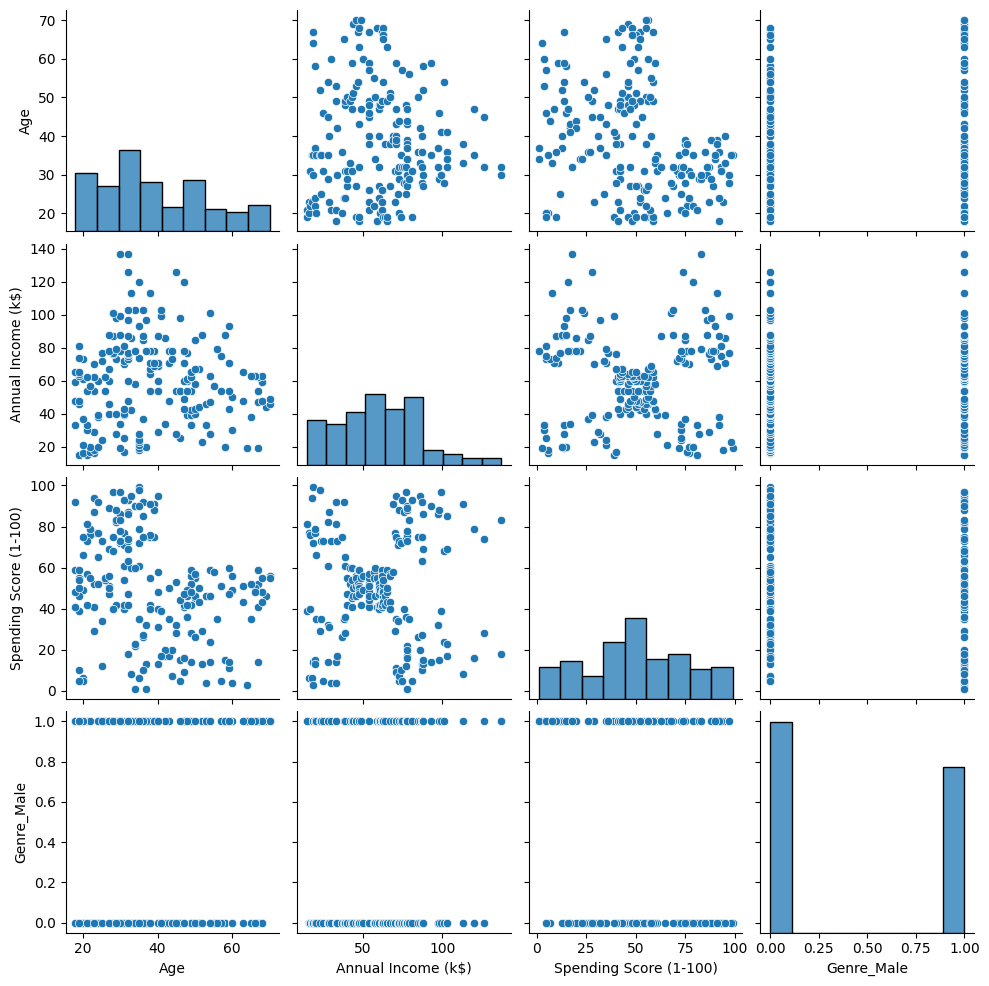

In [10]:
sns.pairplot(df)

### KMean Clustering

In [19]:
km = KMeans(n_clusters = 5)

In [20]:
prediction = km.fit_predict(df)
prediction.shape

D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(200,)

In [21]:
df.shape

(200, 4)

In [22]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male'], dtype='object')

In [23]:
prediction

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 1, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

In [13]:
import matplotlib.pyplot as plt

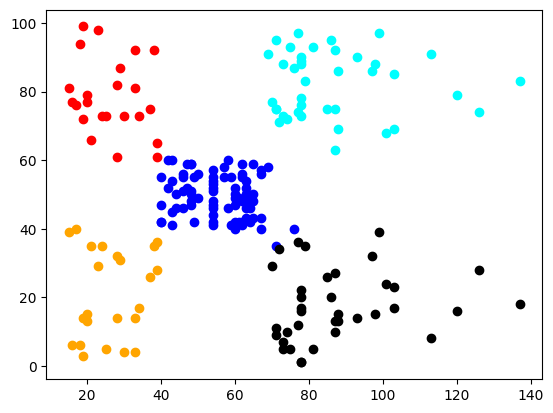

In [24]:
plt.scatter(df.iloc[prediction == 0,1] , df.iloc[prediction == 0,2],color='red');
plt.scatter(df.iloc[prediction == 1,1] , df.iloc[prediction == 1,2],color='blue');
plt.scatter(df.iloc[prediction == 2,1] , df.iloc[prediction == 2,2],color='orange');
plt.scatter(df.iloc[prediction == 3,1] , df.iloc[prediction == 3,2],color='black');
plt.scatter(df.iloc[prediction == 4,1] , df.iloc[prediction == 4,2],color='cyan');

### Agglomerative CLustering 

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
agg = AgglomerativeClustering(n_clusters=5)

In [29]:
prediction = agg.fit_predict(df)

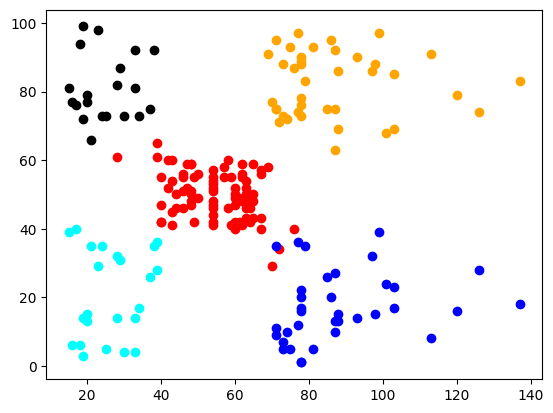

In [30]:
plt.scatter(df.iloc[prediction == 0,1] , df.iloc[prediction == 0,2],color='red');
plt.scatter(df.iloc[prediction == 1,1] , df.iloc[prediction == 1,2],color='blue');
plt.scatter(df.iloc[prediction == 2,1] , df.iloc[prediction == 2,2],color='orange');
plt.scatter(df.iloc[prediction == 3,1] , df.iloc[prediction == 3,2],color='black');
plt.scatter(df.iloc[prediction == 4,1] , df.iloc[prediction == 4,2],color='cyan');

### Using Elbow Methood , H M C is needed?

In [31]:
lo_inirtia = []
for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit(df)
    print(i,km.inertia_)
    lo_inirtia.append(km.inertia_)

D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\

1 308862.06
2 212889.44245524303
3 143391.59236035674
4 104414.67534220169
5 75528.58656469136


D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\

6 58350.65449462818
7 51203.75391673207
8 44392.11566567935
9 40942.747761544015


D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10 37803.76632950382
11 34566.304522705344
12 32739.371617989294
13 29659.326739001743


D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


14 28089.36014129548
15 26971.262347257754
16 24839.708106002185


D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


17 22869.008732280796
18 22086.34801771586
19 20905.11141636142


D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


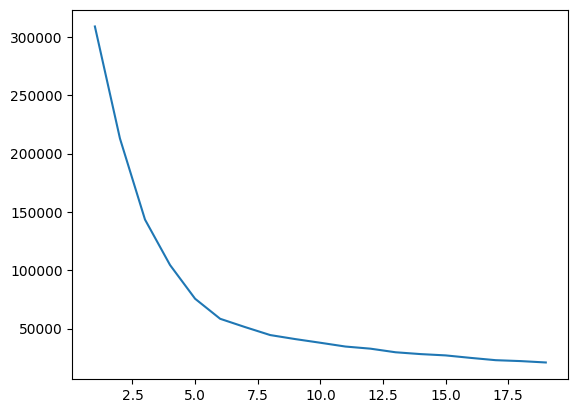

In [32]:
plt.plot(range(1,20),lo_inirtia)

In [34]:
km = KMeans(n_clusters=6)
prediction = km.fit_predict(df)

D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


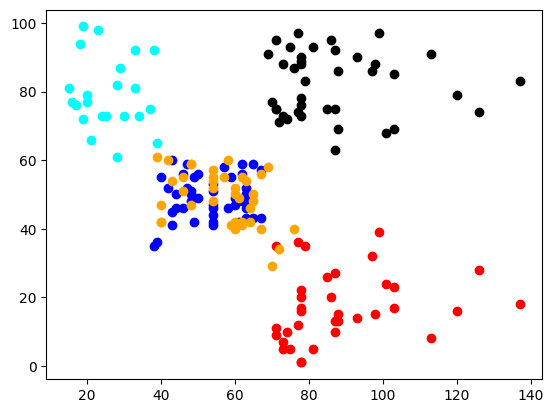

In [35]:
plt.scatter(df.iloc[prediction == 0,1] , df.iloc[prediction == 0,2],color='red');
plt.scatter(df.iloc[prediction == 1,1] , df.iloc[prediction == 1,2],color='blue');
plt.scatter(df.iloc[prediction == 2,1] , df.iloc[prediction == 2,2],color='orange');
plt.scatter(df.iloc[prediction == 3,1] , df.iloc[prediction == 3,2],color='black');
plt.scatter(df.iloc[prediction == 4,1] , df.iloc[prediction == 4,2],color='cyan');